# Week 2

In [29]:
import urllib.request
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import calplot
import plotly.express as px

In [3]:
url1 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data1.tsv'
url2 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data2.tsv'
url3 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data3.tsv'
url4 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data4.tsv'

### Part 1

In [4]:
data1 = pd.read_csv(url1, delimiter='\t', header=None, names=['x', 'y'])
data2 = pd.read_csv(url2, delimiter='\t', header=None, names=['x', 'y'])
data3 = pd.read_csv(url3, delimiter='\t', header=None, names=['x', 'y'])
data4 = pd.read_csv(url4, delimiter='\t', header=None, names=['x', 'y'])

In [5]:
data = [data1.sort_values(by=['x']), data2.sort_values(by=['x']), data3.sort_values(by=['x']), data4.sort_values(by=['x'])]
fittedlines = []
for i in range(0, 4):
    meanx = np.mean(data[i]['x'])
    meany = np.mean(data[i]['y'])
    print("{:d}. dataset means: x={:.2f}, y={:.2f}".format(i+1, meanx, meany))
    varx = np.var(data[i]['x'])
    vary = np.var(data[i]['y'])
    print("{:d}. dataset variances: x={:.3f}, y={:.3f}".format(i+1, varx, vary))
    pearson = np.corrcoef(data[i], rowvar=False)
    np.set_printoptions(precision=3)
    print("Pearson correlation coefficient:")
    print(pearson)
    slope, intercept, r_value, p_value, std_err = stats.linregress(data[i]['x'],data[i]['y'])
    print("f(x) = {:.2f}x + {:.2f}".format(slope, intercept))
    fittedlines.append((slope, intercept))
    print('\n')

1. dataset means: x=9.00, y=7.50
1. dataset variances: x=10.000, y=3.752
Pearson correlation coefficient:
[[1.    0.816]
 [0.816 1.   ]]
f(x) = 0.50x + 3.00


2. dataset means: x=9.00, y=7.50
2. dataset variances: x=10.000, y=3.752
Pearson correlation coefficient:
[[1.    0.816]
 [0.816 1.   ]]
f(x) = 0.50x + 3.00


3. dataset means: x=9.00, y=7.50
3. dataset variances: x=10.000, y=3.748
Pearson correlation coefficient:
[[1.    0.816]
 [0.816 1.   ]]
f(x) = 0.50x + 3.00


4. dataset means: x=9.00, y=7.50
4. dataset variances: x=10.000, y=3.748
Pearson correlation coefficient:
[[1.    0.817]
 [0.817 1.   ]]
f(x) = 0.50x + 3.00




From the calculated values, the datasets are extremely similar, with only a slight difference in variance. 

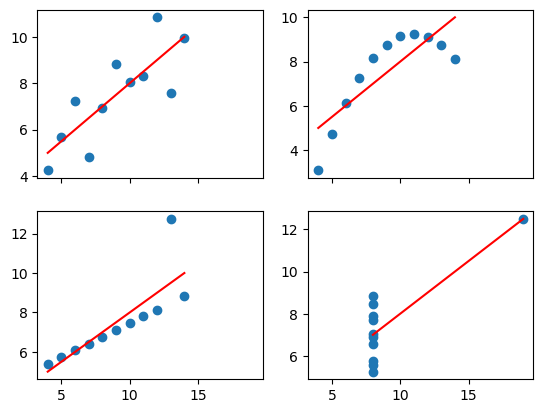

In [6]:
fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True)
i = 0
for row in axes:
    for col in row:
        x = data[i]['x']
        col.scatter(x, data[i]['y'])
        y = fittedlines[i][0]*x + fittedlines[i][1]
        col.plot(x, y, color='red')
        i += 1
plt.show()

### Part 2

In [7]:
columns = ['Category', 'Date', 'Time', 'DayOfWeek']
data = pd.read_csv('crime.csv')
crimeData = pd.DataFrame(data, columns=columns)
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [8]:
crimeData['Date'] = pd.to_datetime(crimeData['Date'])
crimeData['Time'] = pd.to_datetime(crimeData['Time'])
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 
crimeData = crimeData[crimeData['Date'].dt.year != 2018]
crimeData

,Category,Date,Time,DayOfWeek
0,ROBBERY,2004-11-22,2023-02-20 17:50:00,Monday
1,VEHICLE THEFT,2005-10-18,2023-02-20 20:00:00,Tuesday
2,VEHICLE THEFT,2004-02-15,2023-02-20 02:00:00,Sunday
3,ARSON,2011-02-18,2023-02-20 05:27:00,Friday
4,ASSAULT,2010-11-21,2023-02-20 17:00:00,Sunday
...,...,...,...,...
2129520,DRUG/NARCOTIC,2017-06-22,2023-02-20 01:42:00,Thursday
2129521,ASSAULT,2017-09-01,2023-02-20 17:00:00,Friday
2129522,OTHER OFFENSES,2017-06-30,2023-02-20 17:50:00,Friday
2129523,OTHER OFFENSES,2017-12-20,2023-02-20 15:41:00,Wednesday


In [9]:
""" categorizedDaily = {}
days = pd.unique(crimeData['DayOfWeek'])
for category in focuscrimes:
    dict = {}
    for day in days:
        # filtering data to count the crimes in the specific category per day
        temp = crimeData.loc[data['DayOfWeek'] == day]
        count = temp.loc[data['Category'] == category].shape[0]
        dict[day] = count
    # creating dataframe and adding it to dictionary labeled with the crime category
    df = pd.DataFrame(dict.items(), columns=['Day of the Week', 'Crime count'])
    categorizedDaily[category] = df
categorizedDaily """

" categorizedDaily = {}\ndays = pd.unique(crimeData['DayOfWeek'])\nfor category in focuscrimes:\n    dict = {}\n    for day in days:\n        # filtering data to count the crimes in the specific category per day\n        temp = crimeData.loc[data['DayOfWeek'] == day]\n        count = temp.loc[data['Category'] == category].shape[0]\n        dict[day] = count\n    # creating dataframe and adding it to dictionary labeled with the crime category\n    df = pd.DataFrame(dict.items(), columns=['Day of the Week', 'Crime count'])\n    categorizedDaily[category] = df\ncategorizedDaily "

In [10]:
categorizedDaily = {}
for category in focuscrimes:
    df = crimeData[["Category", "DayOfWeek"]]
    df = df.loc[df['Category'] == category]
    df = df.groupby(['DayOfWeek']).count().reindex(weekdays)
    df.rename(columns={'Category': 'Count'}, inplace=True)
    categorizedDaily[category] = df
categorizedDaily

{'DRUNKENNESS':            Count
 DayOfWeek       
 Monday      1176
 Tuesday     1087
 Wednesday   1165
 Thursday    1133
 Friday      1414
 Saturday    1823
 Sunday      1878,
 'DISORDERLY CONDUCT':            Count
 DayOfWeek       
 Monday      1450
 Tuesday     1541
 Wednesday   1576
 Thursday    1419
 Friday      1211
 Saturday    1370
 Sunday      1271,
 'VEHICLE THEFT':            Count
 DayOfWeek       
 Monday     17062
 Tuesday    16921
 Wednesday  17492
 Thursday   17355
 Friday     19839
 Saturday   18637
 Sunday     17453,
 'PROSTITUTION':            Count
 DayOfWeek       
 Monday      1123
 Tuesday     3003
 Wednesday   3291
 Thursday    3630
 Friday      2776
 Saturday    1571
 Sunday      1059,
 'WEAPON LAWS':            Count
 DayOfWeek       
 Monday      2858
 Tuesday     2837
 Wednesday   3045
 Thursday    2882
 Friday      3070
 Saturday    2952
 Sunday      2753,
 'DRUG/NARCOTIC':            Count
 DayOfWeek       
 Monday     16448
 Tuesday    18574
 Wednesday 

In [11]:
categorizedMonthly = {}
for category in focuscrimes:
    df = crimeData[["Category", "Date"]]
    df = df.loc[df['Category'] == category]
    df = df.groupby(df['Date'].dt.month_name()).count().reindex(months)
    df.rename(columns={'Category': 'Count'}, inplace=True)
    categorizedMonthly[category] = df
categorizedMonthly

{'DRUNKENNESS':            Count  Date
 Date                  
 January      827   827
 February     743   743
 March        838   838
 April        783   783
 May          859   859
 June         775   775
 July         785   785
 August       854   854
 September    809   809
 October      908   908
 November     739   739
 December     756   756,
 'DISORDERLY CONDUCT':            Count  Date
 Date                  
 January      871   871
 February     784   784
 March        877   877
 April        798   798
 May          885   885
 June         753   753
 July         791   791
 August       847   847
 September    863   863
 October      841   841
 November     844   844
 December     684   684,
 'VEHICLE THEFT':            Count   Date
 Date                   
 January    10185  10185
 February    9328   9328
 March      10365  10365
 April      10471  10471
 May        10327  10327
 June       10057  10057
 July       10403  10403
 August     10923  10923
 September  10608  106

In [12]:
categorizedHourly = {}
for category in focuscrimes:
    df = crimeData[["Category", "Time"]]
    df = df.loc[df['Category'] == category]
    df = df.groupby(df['Time'].dt.hour).count()
    df.rename(columns={'Category': 'Count'}, inplace=True)
    categorizedHourly[category] = df
categorizedHourly

{'DRUNKENNESS':       Count  Time
 Time             
 0       817   817
 1       774   774
 2       656   656
 3       258   258
 4       132   132
 5        45    45
 6        80    80
 7       163   163
 8       153   153
 9       173   173
 10      200   200
 11      283   283
 12      282   282
 13      281   281
 14      323   323
 15      358   358
 16      432   432
 17      506   506
 18      566   566
 19      542   542
 20      565   565
 21      613   613
 22      739   739
 23      735   735,
 'DISORDERLY CONDUCT':       Count  Time
 Time             
 0       517   517
 1       380   380
 2       341   341
 3       216   216
 4       158   158
 5       395   395
 6       999   999
 7       904   904
 8       673   673
 9       509   509
 10      433   433
 11      387   387
 12      388   388
 13      369   369
 14      343   343
 15      327   327
 16      303   303
 17      289   289
 18      322   322
 19      264   264
 20      249   249
 21      281   281
 22      383

In [13]:
# TODO
categorizedHourlyWithDay = {}
for category in focuscrimes:
    df = crimeData[["Category", "Date", "Time"]]
    df = df.loc[df['Category'] == category]
    df = df.groupby([df['Date'].dt.day_name(), df['Time'].dt.hour]).count()
    df.rename(columns={'Category': 'Count'}, inplace=True)
    categorizedHourlyWithDay[category] = df
categorizedHourlyWithDay

{'DRUNKENNESS':                 Count  Date  Time
 Date      Time                   
 Friday    0        96    96    96
           1       105   105   105
           2        92    92    92
           3        31    31    31
           4        17    17    17
 ...               ...   ...   ...
 Wednesday 19       62    62    62
           20       71    71    71
           21       87    87    87
           22       85    85    85
           23       97    97    97
 
 [168 rows x 3 columns],
 'DISORDERLY CONDUCT':                 Count  Date  Time
 Date      Time                   
 Friday    0        73    73    73
           1        65    65    65
           2        40    40    40
           3        22    22    22
           4        26    26    26
 ...               ...   ...   ...
 Wednesday 19       47    47    47
           20       37    37    37
           21       39    39    39
           22       60    60    60
           23       66    66    66
 
 [168 rows x 3 columns],

##### Weekly trends in crime

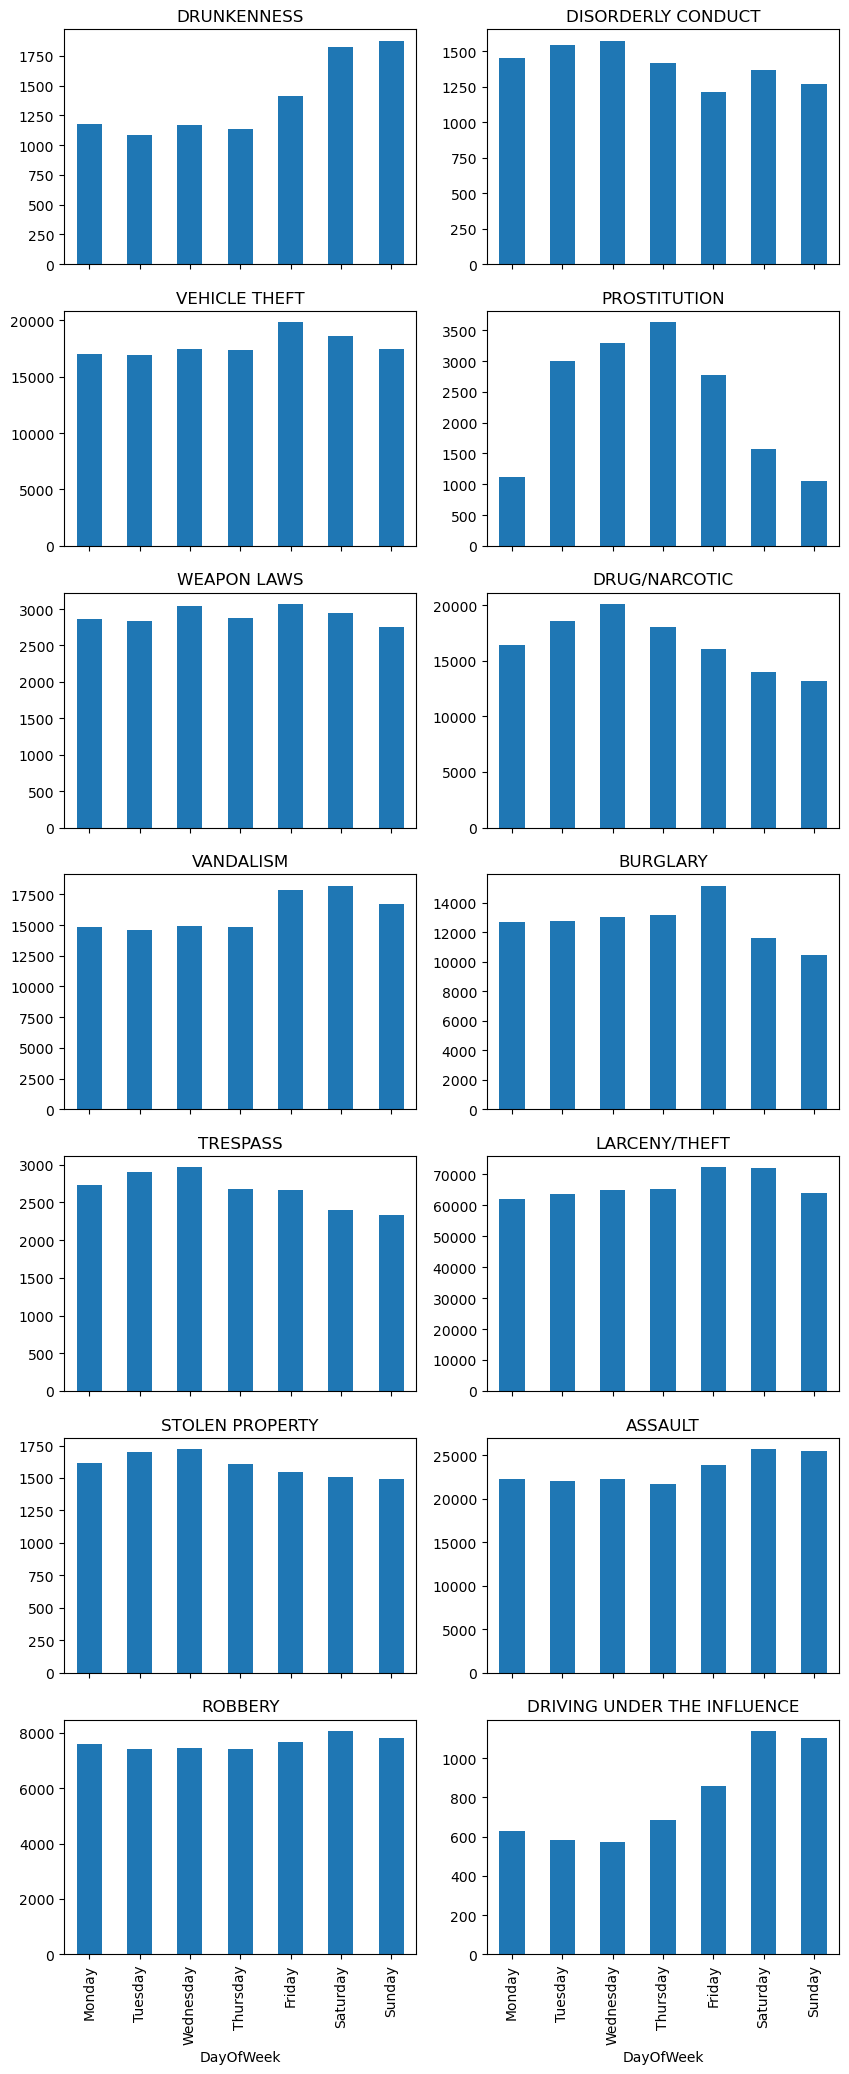

In [14]:
fig, axes = plt.subplots(nrows=7, ncols=2, sharex=True)
for i, (crime, df) in enumerate(categorizedDaily.items()):
    df.plot(kind='bar', ax=axes[i//2, i%2], title=crime, figsize=(10,25), legend=None)

##### Monthly trends in crimes

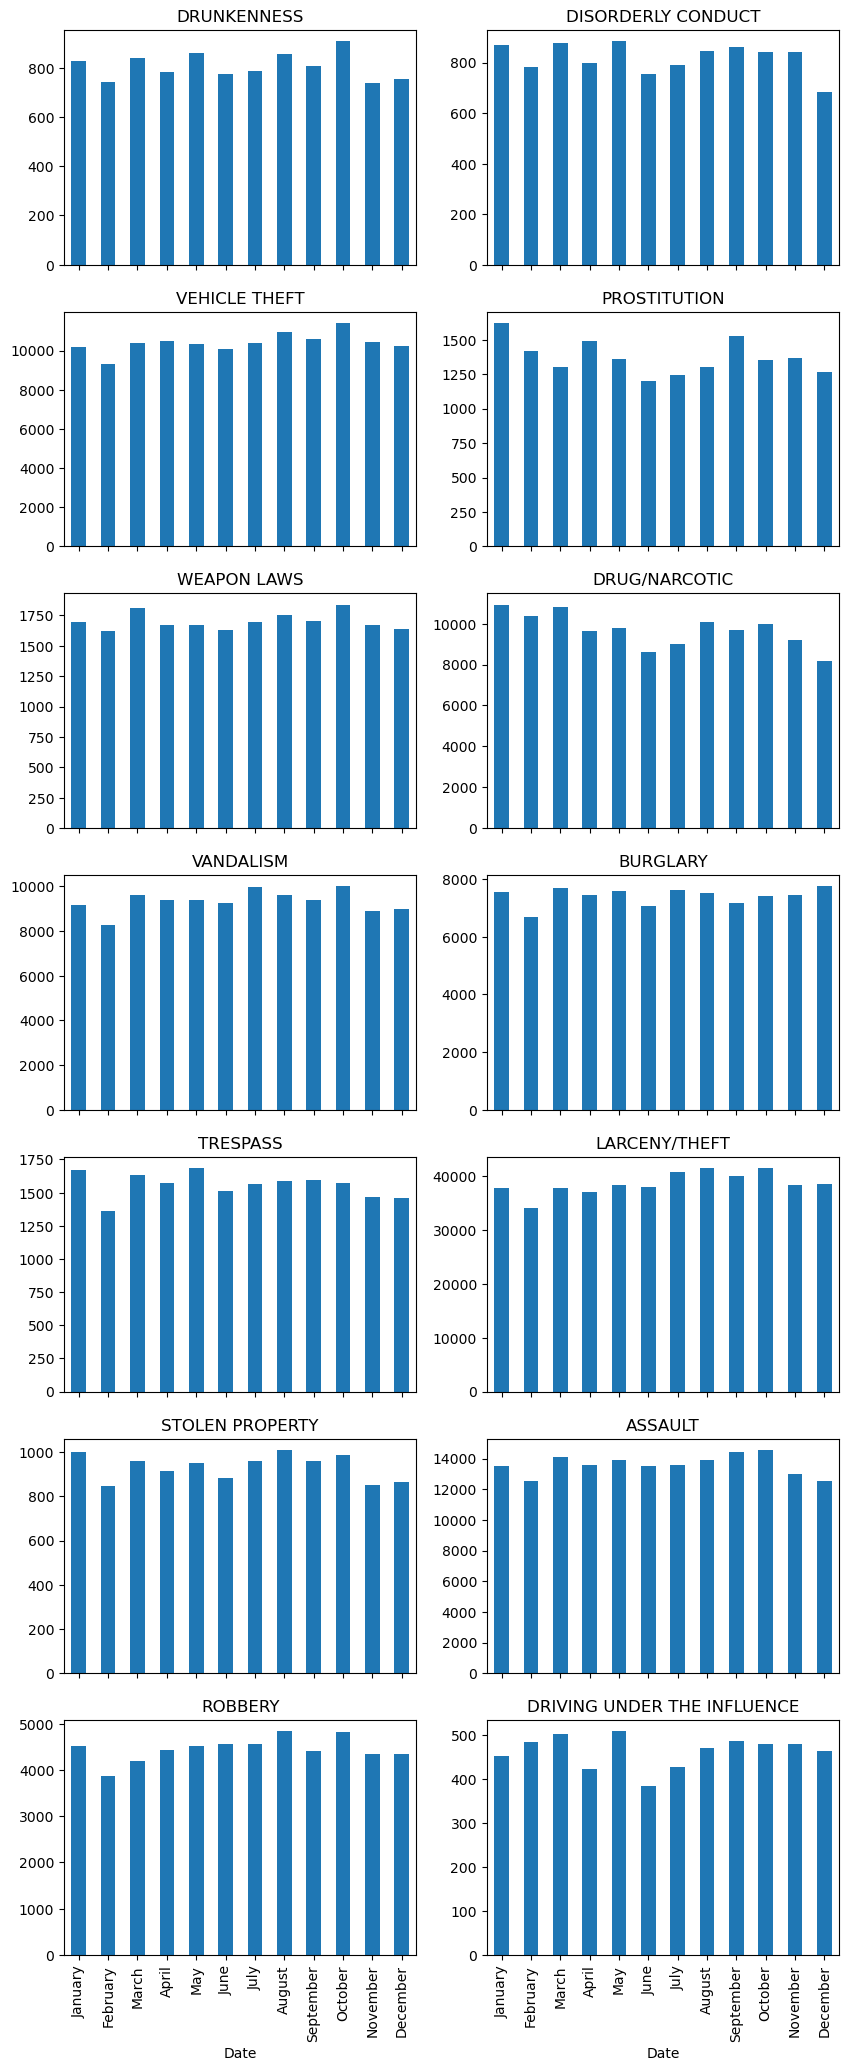

In [15]:
fig, axes = plt.subplots(nrows=7, ncols=2, sharex=True)
for i, (crime, df) in enumerate(categorizedMonthly.items()):
    df['Count'].plot(kind='bar', ax=axes[i//2, i%2], title=crime, figsize=(10,25), legend=None)

##### Hourly trends in crime

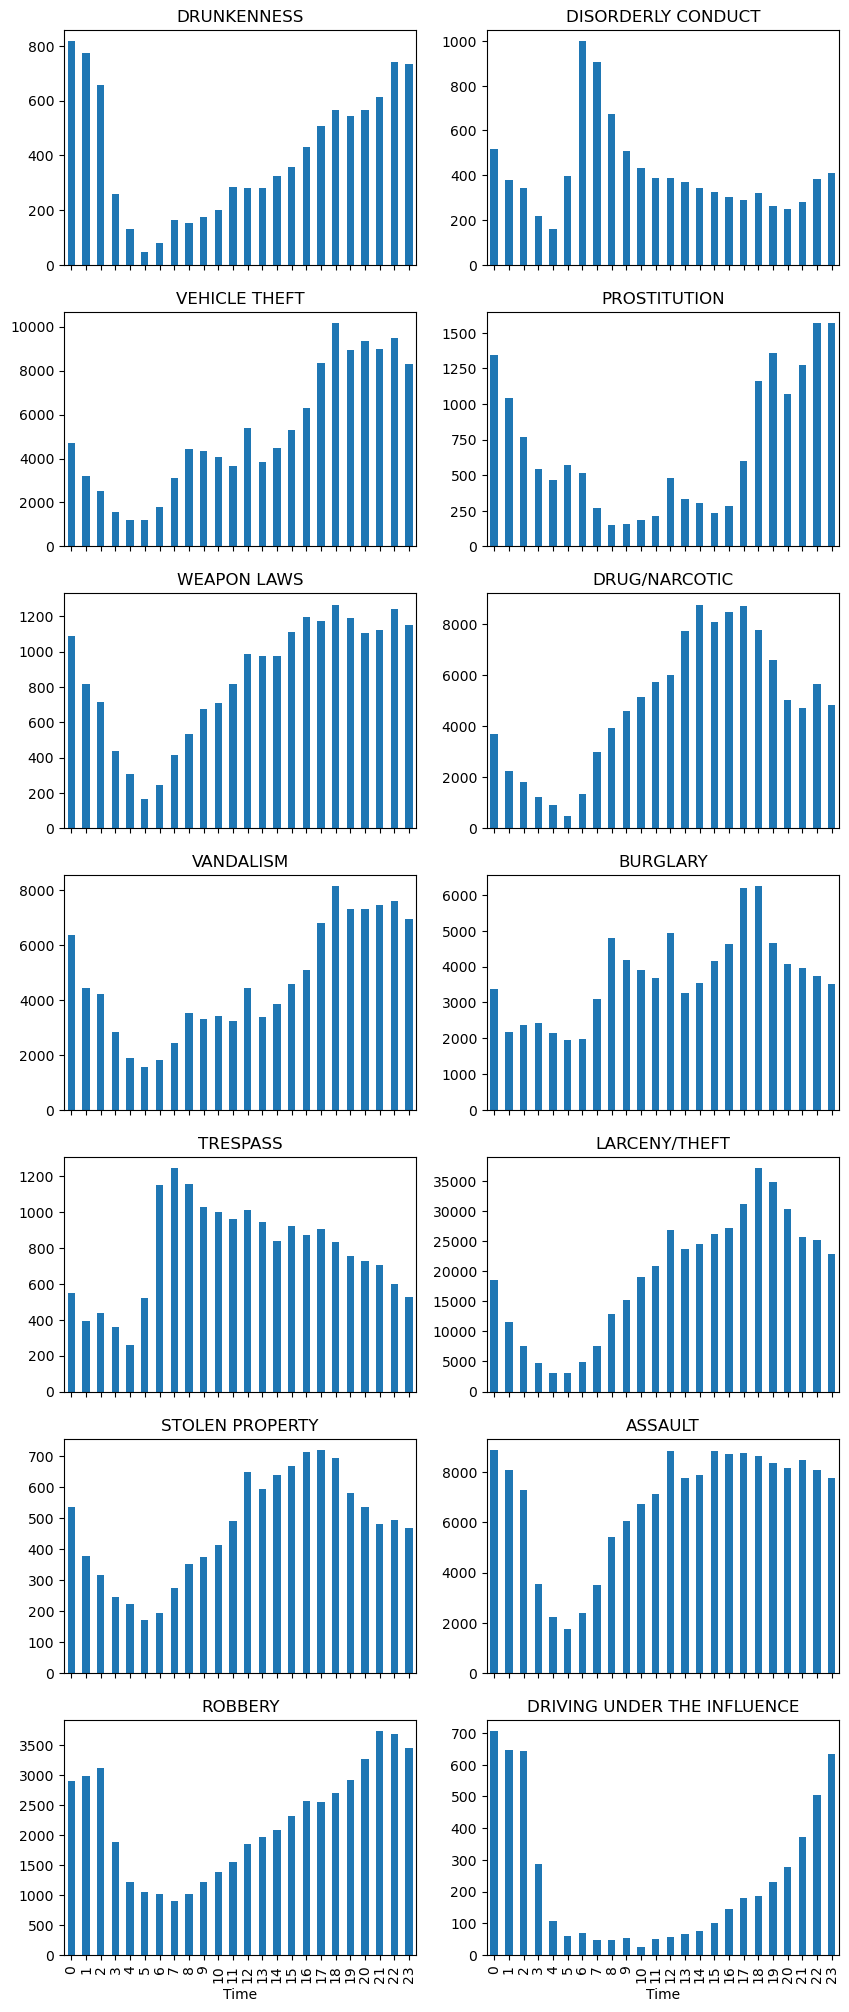

In [16]:
fig, axes = plt.subplots(nrows=7, ncols=2, sharex=True)
for i, (crime, df) in enumerate(categorizedHourly.items()):
    df['Count'].plot(kind='bar', ax=axes[i//2, i%2], title=crime, figsize=(10,25), legend=None)

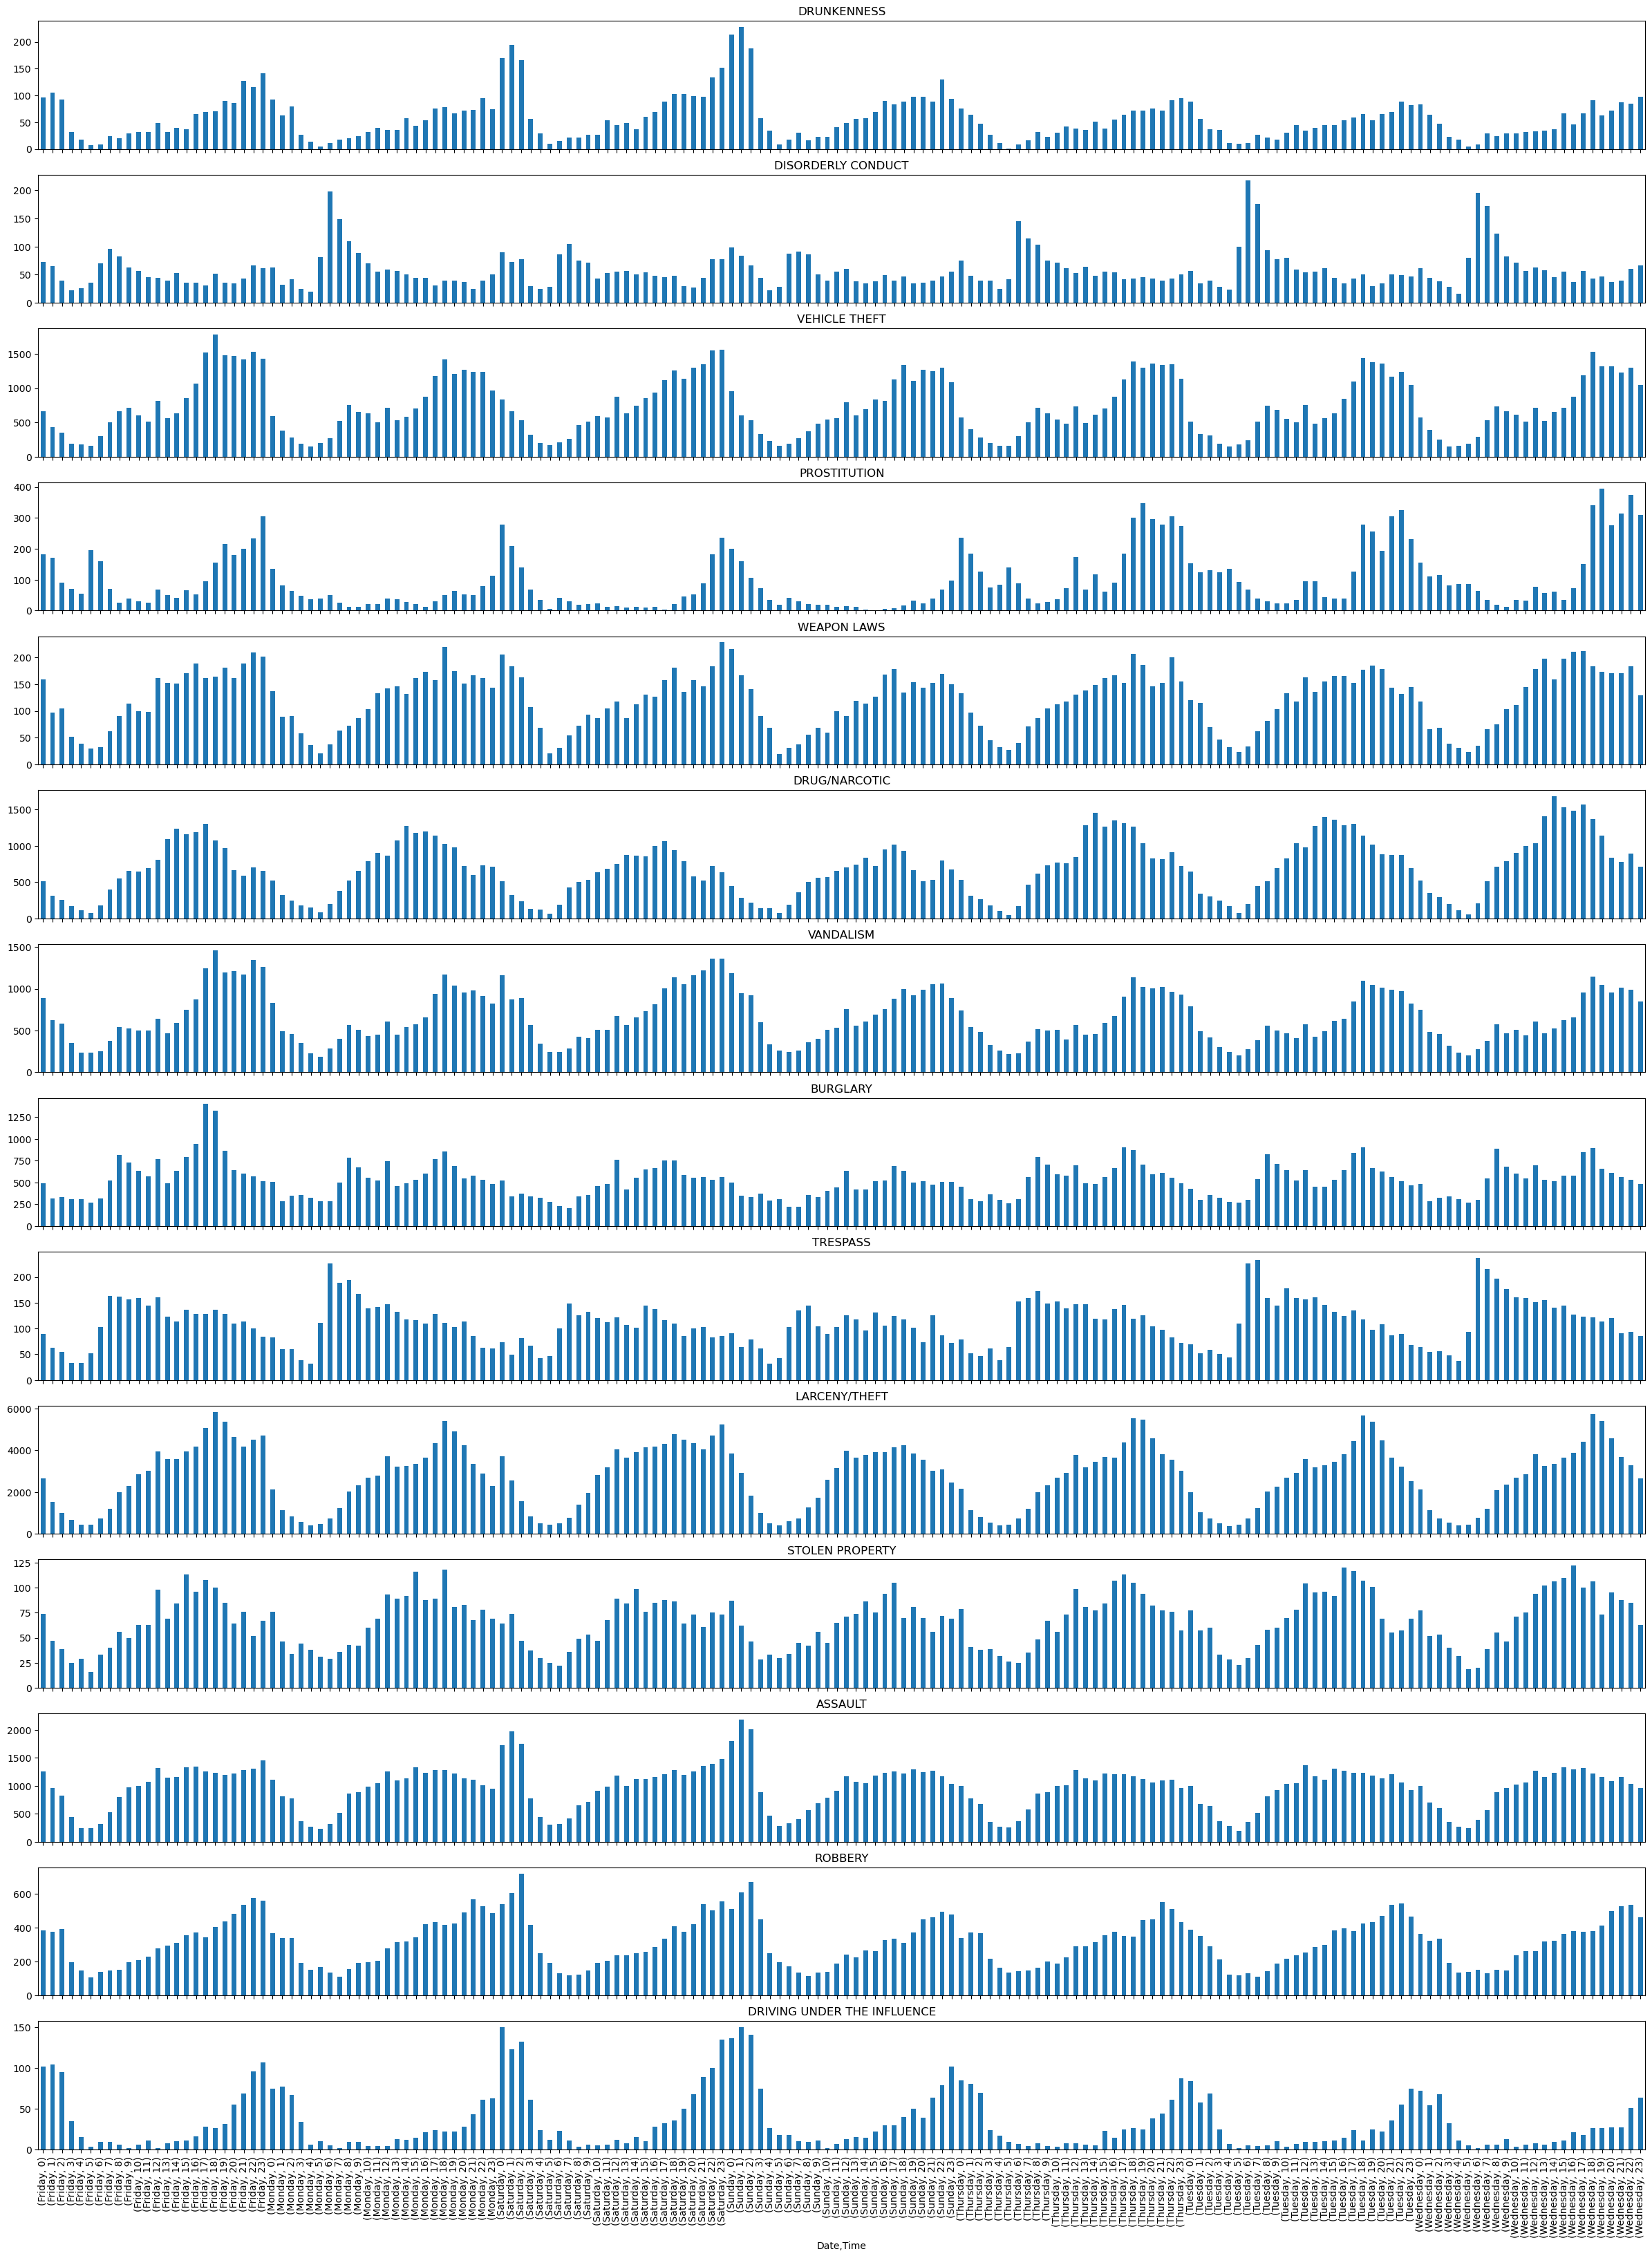

In [17]:
fig, axes = plt.subplots(nrows=14, ncols=1, sharex=True)
for i, (crime, df) in enumerate(categorizedHourlyWithDay.items()):
    df['Count'].plot(kind='bar', ax=axes[i], title=crime, figsize=(30,40), legend=None)

### Part 4

Article about calplot: https://thiago-bernardes-carvalho.medium.com/calendar-heatmaps-with-pythons-calplot-b4dec29ee805

/var/folders/2f/78qzpl6n3x346dxl7yjbx3mr0000gn/T/ipykernel_36102/237584458.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  assaultData = assaultData[crimeData['Date'].dt.year.isin(range(2012, 2018))]


(<Figure size 1250x1020 with 7 Axes>,
 array([<AxesSubplot:ylabel='2012'>, <AxesSubplot:ylabel='2013'>,
        <AxesSubplot:ylabel='2014'>, <AxesSubplot:ylabel='2015'>,
        <AxesSubplot:ylabel='2016'>, <AxesSubplot:ylabel='2017'>],
       dtype=object))

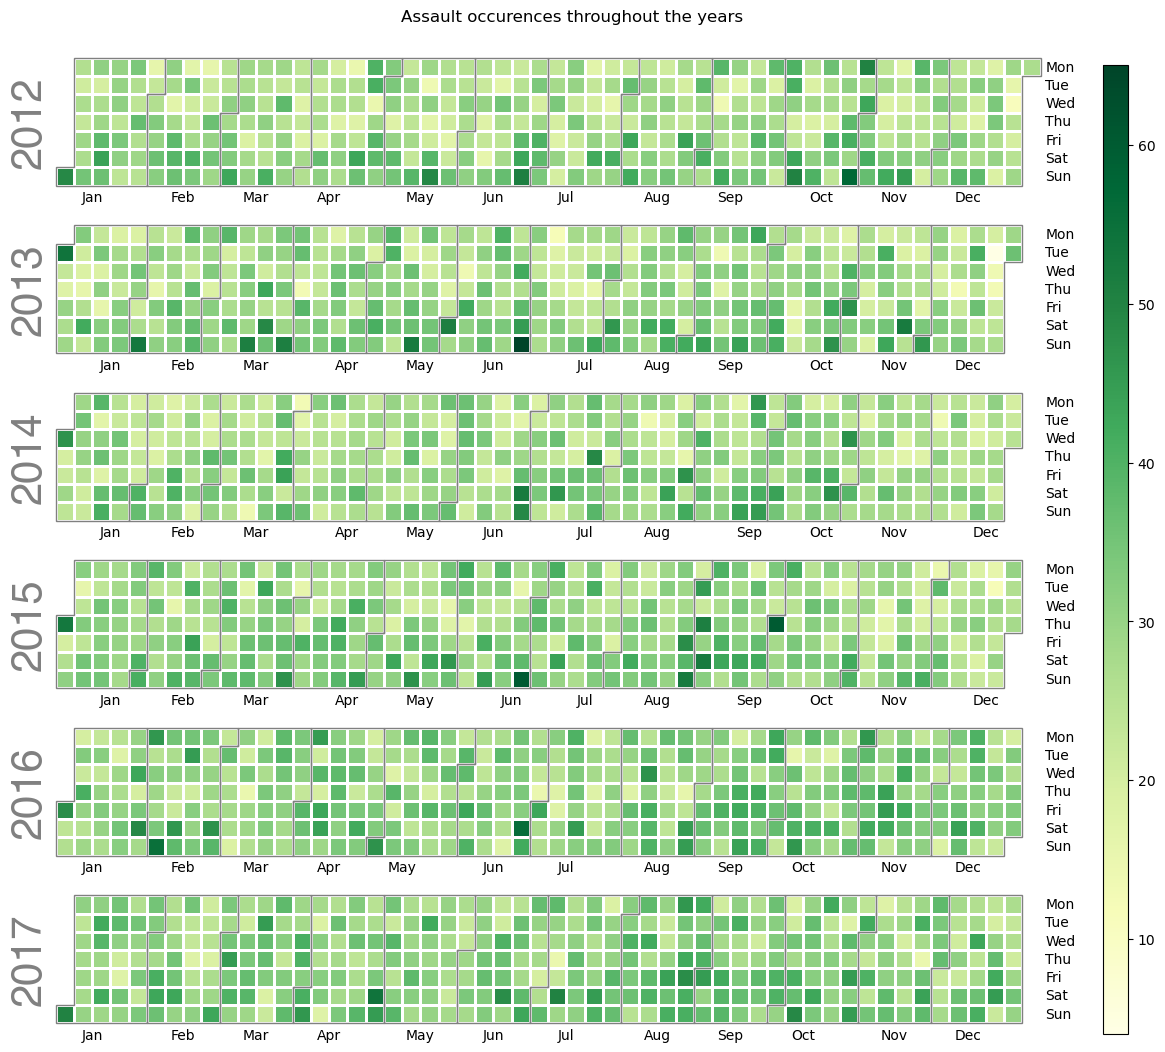

In [28]:
assaultData = crimeData[crimeData['Category'] == 'ASSAULT']
assaultData = assaultData[crimeData['Date'].dt.year.isin(range(2012, 2018))]
assaultData.set_index('Date', inplace=True)
title = 'Assault occurences throughout the years'
calplot.calplot(assaultData['Category'], how='count', cmap='YlGn', colorbar=True, suptitle=title)

In [30]:
date = '2017-06-03'
dayData = crimeData[crimeData['Date'] == date]
fig = px.bar_polar(dayData, r='count', theta='Time.dt.hour')
fig.show()

ValueError: Value of 'r' is not the name of a column in 'data_frame'. Expected one of ['Category', 'Date', 'Time', 'DayOfWeek'] but received: count